In [227]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pathlib import Path
from common_functions import show
import os

## Расстановка фрагментов

In [228]:
def shift_image(image_path, shift_x, shift_y, save_path):
    """
    Смещает изображение на указанные координаты.

    :param image_path: Путь к изображению.
    :param shift_x: Смещение по оси X.
    :param shift_y: Смещение по оси Y.
    """
    # Считываем изображение
    image = cv2.imread(image_path)
    
    # Проверяем, что изображение было загружено
    if image is None:
        print("Ошибка: изображение не найдено.")
        return
    
    # Получаем размеры изображения
    h, w, _ = image.shape
    
    # Создаем пустое изображение с белым фоном
    shifted_image = np.ones_like(image) * 255
    
    # Смещаем изображение
    shifted_image[max(0, shift_y):min(h, h + shift_y), max(0, shift_x):min(w, w + shift_x)] = image[max(0, -shift_y):min(h, h - shift_y), max(0, -shift_x):min(w, w - shift_x)]
    
    cv2.imwrite(save_path, shifted_image)
    
    # Показываем смещенное изображение
    # show(shifted_image)

In [229]:
def overlay_images_from_folder(imgs_path, output_path):
    folder_path = Path(imgs_path)
    image_files = [f.name for f in folder_path.iterdir() if f.is_file()]
    if not image_files:
        print("Нет изображений в папке.")
        return

    # Загружаем первое изображение как основу
    base = cv2.imread(os.path.join(folder_path, image_files[0]), cv2.IMREAD_COLOR)
    if base is None:
        print("Ошибка загрузки первого изображения.")
        return

    # Проходим по остальным и накладываем
    for filename in image_files[1:]:
        img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_COLOR)
        if img is None:
            continue
        base = cv2.add(base, img)  # Поэлементное сложение

    show(base)
    
    # Сохраняем результат
    cv2.imwrite(output_path, base)
    print(f"Сохранено: {output_path}")

### test1

In [230]:
resize_size = 250

folder_path = Path("pics/test1/split_results_all")
file_names = [f.name for f in folder_path.iterdir() if f.is_file()]

print(file_names)

for i in range (len(file_names)):
    img = cv2.imread(f"pics/test1/split_results_all/{file_names[i]}")
    img = cv2.resize(img, (resize_size, resize_size))
    cv2.imwrite(f'pics/test1/resized/{file_names[i]}', img)

['fragment_1.png', 'fragment_2.png', 'fragment_3.png', 'fragment_4.png', 'fragment_5.png', 'fragment_6.png']


In [231]:
coordanates = [
    (-3, 20), # 1
    (-25, 15),  # 2
    (0, 0), # 3
    (2, -20), # 4
    (-22, -5), # 5
    (-27, 0) # 6
]

In [232]:
for i in range (len(file_names)):
    shift_image(f'pics/test1/resized/{file_names[i]}', coordanates[i][0], coordanates[i][1], f'pics/test1/shifted_fragments/{file_names[i]}')

In [233]:
for i in range (len(file_names)):
    shift_image(f'pics/test1/extrapolation_results/{file_names[i]}', coordanates[i][0], coordanates[i][1], f'pics/test1/shifted_extr_fragments/{file_names[i]}')

Сохранено: pics/test1/combined_fragments.png


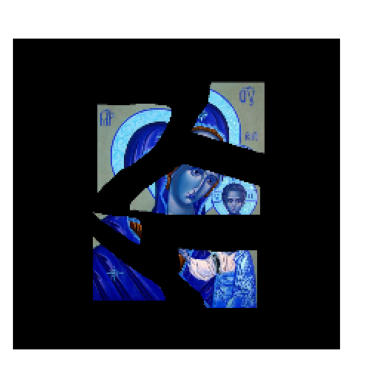

In [234]:
overlay_images_from_folder('pics/test1/shifted_fragments', 'pics/test1/combined_fragments.png')

### test2

In [276]:
resized_path = 'pics/test2/resized/'
resize_size = 250

folder_path = Path("pics/test2/split_results_all")
file_names = [f.name for f in folder_path.iterdir() if f.is_file()]

print(file_names)

for i in range (len(file_names)):
    img = cv2.imread(f"pics/test2/split_results_all/{file_names[i]}")
    img = cv2.resize(img, (resize_size, resize_size))
    cv2.imwrite(f'pics/test2/resized/{file_names[i]}', img)

['fragment_1.png', 'fragment_2.png', 'fragment_3.png', 'fragment_4.png', 'fragment_5.png']


In [ ]:
coordanates = [
    (-37, 22), # 1
    (-53, -15),  # 2
    (20, 70), # 3
    (-15, -9), # 4
    (-22, -5), # 5
]

In [224]:
for i in range (len(file_names)):
    shift_image(f'pics/test2/resized/{file_names[i]}', coordanates[i][0], coordanates[i][1], f'pics/test2/shifted_fragments/{file_names[i]}')

In [225]:
for i in range (len(file_names)):
    shift_image(f'pics/test2/extrapolation_results/{file_names[i]}', coordanates[i][0], coordanates[i][1], f'pics/test2/shifted_extr_fragments/{file_names[i]}')

Сохранено: pics/test2/combined_fragments.png


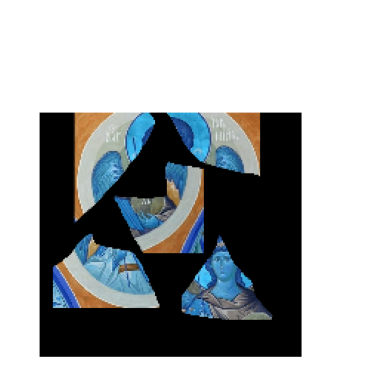

In [226]:
overlay_images_from_folder('pics/test2/shifted_fragments', 'pics/test2/combined_fragments.png')

Сохранено: pics/test2/combined_fragments_res3.png


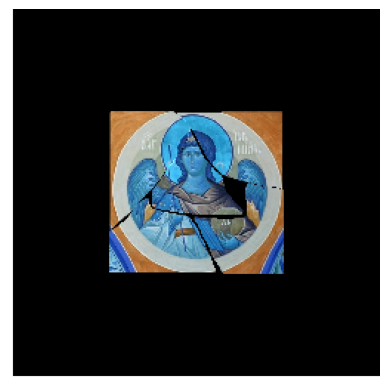

In [317]:




coordanates_res3 = [
    (1,-2), # 1
    (1,-1),  # 2
    (0, -1), # 3
    (0, 0), # 4
    (2, 0), # 5
]

coordanates_res1 = [
    (2,-2), # 1
    (1,-1),  # 2
    (2, 0), # 3
    (0, 0), # 4
    (1, -1), # 5
]

coordanates_res2 = [
    (3,-2), # 1
    (2,-1),  # 2
    (2, 0), # 3
    (0, 0), # 4
    (2, 2), # 5
]

for i in range (len(file_names)):
    shift_image(f'pics/test2/resized/{file_names[i]}', coordanates_res3[i][0], coordanates_res3[i][1], f'pics/test2/shifted_fragments_res3/{file_names[i]}')

overlay_images_from_folder('pics/test2/shifted_fragments_res3', 'pics/test2/combined_fragments_res3.png')


Сохранено: pics/test1/combined_fragments_resized.png
Сохранено: pics/test2/combined_fragments_resized.png


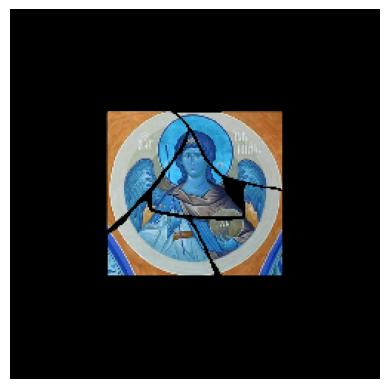

In [319]:
overlay_images_from_folder('pics/test1/resized', 'pics/test1/combined_fragments_resized.png')
overlay_images_from_folder('pics/test2/resized', 'pics/test2/combined_fragments_resized.png')